In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = "keywords_KHJ/news/"
ability_name_list = ["global","active","challenge","sincerity","communication","patience","honest","owner_spirit","creativity","teamwork"]


In [4]:
ability_1 = pd.read_csv(data_path + ability_name_list[0] + ".csv" , encoding="utf-8")
ability_2 = pd.read_csv(data_path + ability_name_list[1] + ".csv" , encoding="utf-8")
ability_3 = pd.read_csv(data_path + ability_name_list[2] + ".csv" , encoding="utf-8")
ability_4 = pd.read_csv(data_path + ability_name_list[3] + ".csv" , encoding="utf-8")
ability_5 = pd.read_csv(data_path + ability_name_list[4] + ".csv" , encoding="utf-8")
ability_6 = pd.read_csv(data_path + ability_name_list[5] + ".csv" , encoding="utf-8")
ability_7 = pd.read_csv(data_path + ability_name_list[6] + ".csv" , encoding="utf-8")
ability_8 = pd.read_csv(data_path + ability_name_list[7] + ".csv" , encoding="utf-8")
ability_9 = pd.read_csv(data_path + ability_name_list[8] + ".csv" , encoding="utf-8")
ability_10 = pd.read_csv(data_path + ability_name_list[9] + ".csv" , encoding="utf-8")

ability_list = [ability_1,ability_2,ability_3,ability_4,ability_5,ability_6,ability_7,ability_8,ability_9,ability_10]
ability_1.head()

,label,sentence
0,1,정부 재난방송 대응 강화… 대피법 안내 수어·외국어자막 의무 (종합)
1,1,수어와 외국어 자막 방송도 의무화하기로 했다. 재난방송 주관사인 KBS 외에 24시...
2,1,'와류→소용돌이'… 법제처 1800개 법령 속 전문용어·외국어 쉽게 바꾼다
3,1,낯선 외국어가 각각 '소용돌이' '강우유출오염원' '내부세척' '절터' 등 비교적 ...
4,1,특수외국어 실용 강좌 협약식


In [60]:
print("[파일 크기]")
for file in os.listdir(data_path) :
    print(file.ljust(20) + str(round(os.path.getsize(data_path + file) / 1000000, 2)) + "MB")

[파일 크기]
patience.csv        1.11MB
creativity.csv      1.1MB
active.csv          1.09MB
honest.csv          1.15MB
challenge.csv       1.12MB
communication.csv   1.09MB
sincerity.csv       1.11MB
owner_spirit.csv    1.13MB
teamwork.csv        1.1MB
global.csv          1.08MB


In [6]:
print("[데이터 개수]")

for i in range(0,10):
    print(ability_name_list[i] + ": " + format(len(ability_list[i])))

[데이터 개수]
global: 6020
active: 6020
challenge: 6020
sincerity: 6020
communication: 6020
patience: 6020
honest: 6020
owner_spirit: 6020
creativity: 6020
teamwork: 6020


0     38
1    124
2     41
3    124
4     15
Name: sentence, dtype: int64
0     28
1    120
2     28
3    114
4     30
Name: sentence, dtype: int64
0     51
1    110
2     18
3    115
4     38
Name: sentence, dtype: int64
0     29
1     97
2     39
3    125
4     39
Name: sentence, dtype: int64
0     26
1    120
2     24
3    120
4     24
Name: sentence, dtype: int64
0     27
1    118
2     26
3    123
4     34
Name: sentence, dtype: int64
0     43
1    129
2     31
3    117
4     29
Name: sentence, dtype: int64
0     30
1    114
2     29
3    122
4     80
Name: sentence, dtype: int64
0     40
1    119
2     36
3    121
4     33
Name: sentence, dtype: int64
0     26
1    114
2     21
3     79
4     25
Name: sentence, dtype: int64


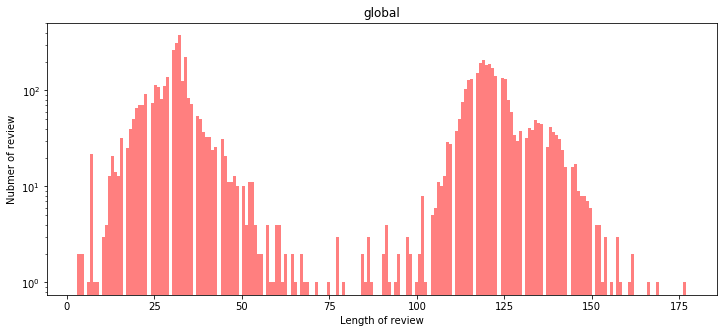

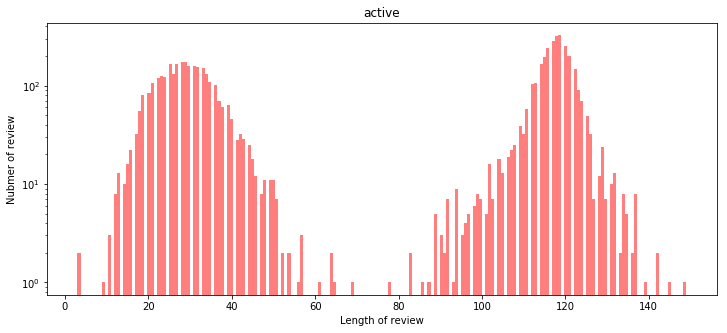

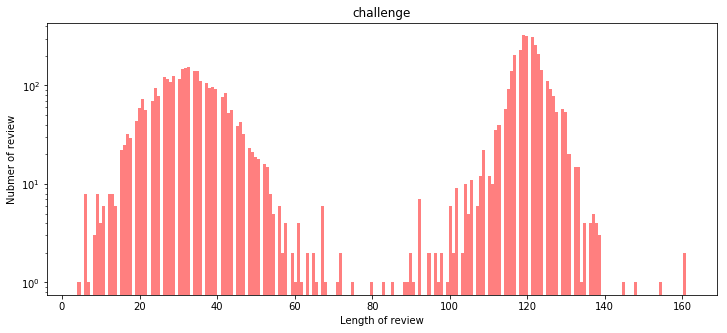

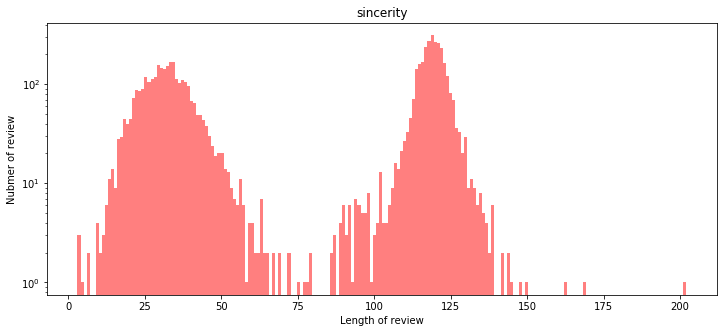

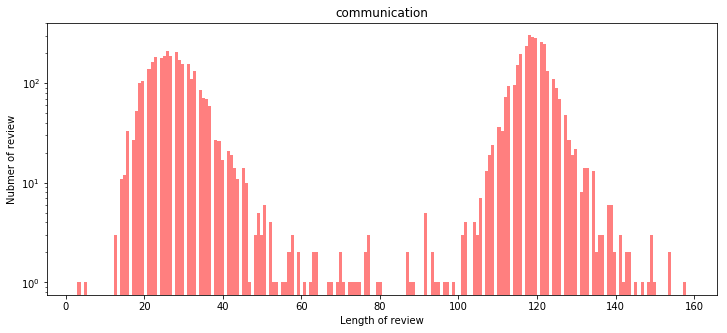

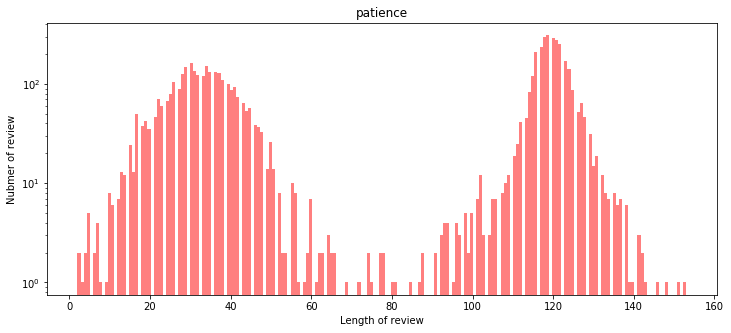

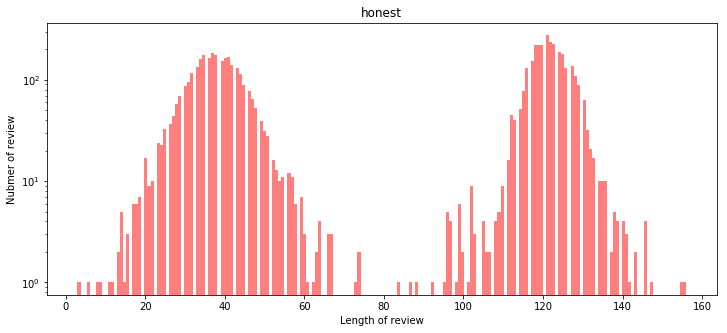

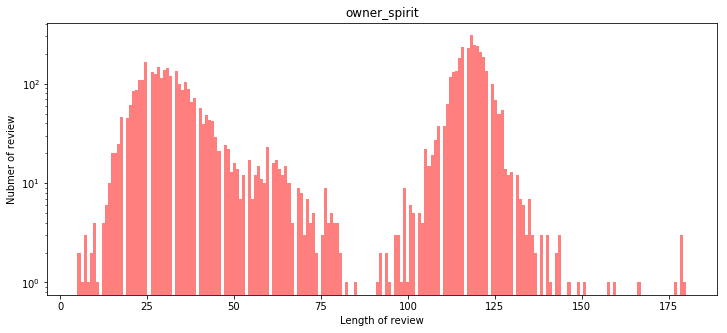

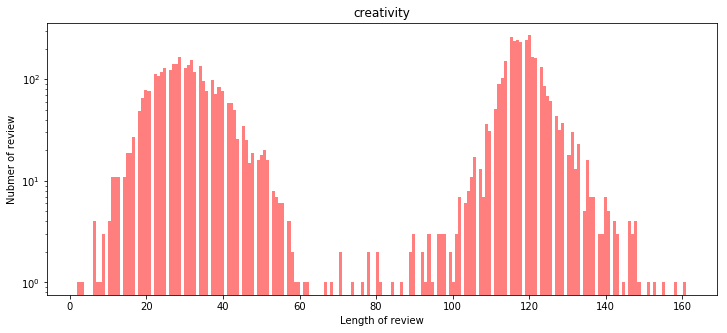

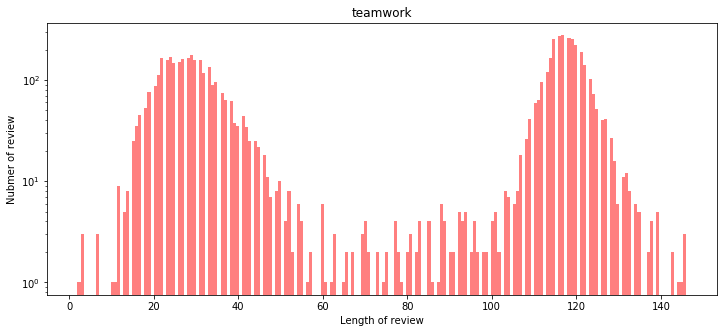

In [31]:
print("[문자열 길이 분포]")
for i in range(0,10):
    train_length = ability_list[i]['sentence'].astype(str).apply(len)
    print(train_length.head())

    plt.figure(figsize=(12,5))
    plt.hist(train_length, bins=200, alpha=0.5, color='r',label='word')
    plt.yscale('log', nonposy='clip')
    plt.xlabel('Length of review')
    plt.ylabel('Nubmer of review')
    plt.title(ability_name_list[i])

In [37]:
for i in range(0,10):
    train_length = ability_list[i]['sentence'].astype(str).apply(len)
    print(ability_name_list[i]+' 길이 최댓값:{}'.format(np.max(train_length)))
    print(ability_name_list[i]+' 길이 최솟값:{}'.format(np.min(train_length)))

global 길이 최댓값:177
global 길이 최솟값:3
active 길이 최댓값:149
active 길이 최솟값:3
challenge 길이 최댓값:161
challenge 길이 최솟값:4
sincerity 길이 최댓값:202
sincerity 길이 최솟값:3
communication 길이 최댓값:158
communication 길이 최솟값:3
patience 길이 최댓값:153
patience 길이 최솟값:2
honest 길이 최댓값:156
honest 길이 최솟값:3
owner_spirit 길이 최댓값:180
owner_spirit 길이 최솟값:5
creativity 길이 최댓값:161
creativity 길이 최솟값:2
teamwork 길이 최댓값:146
teamwork 길이 최솟값:2


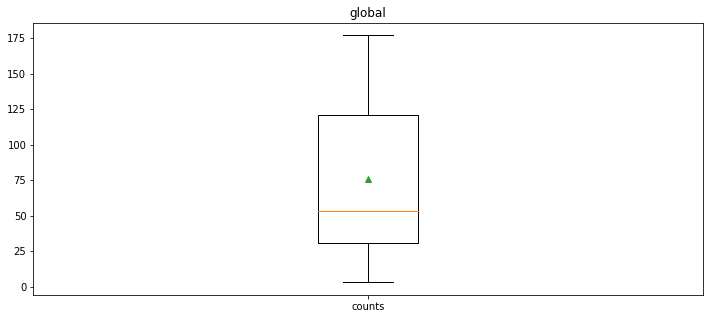

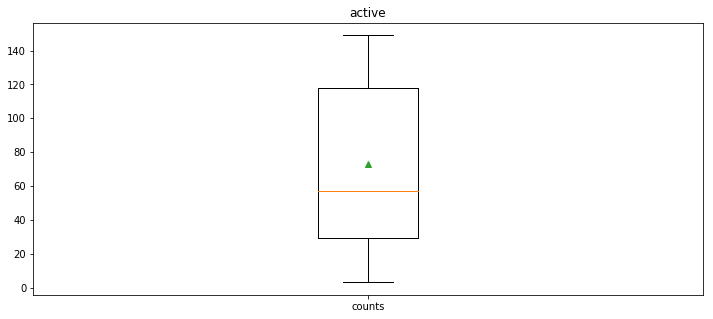

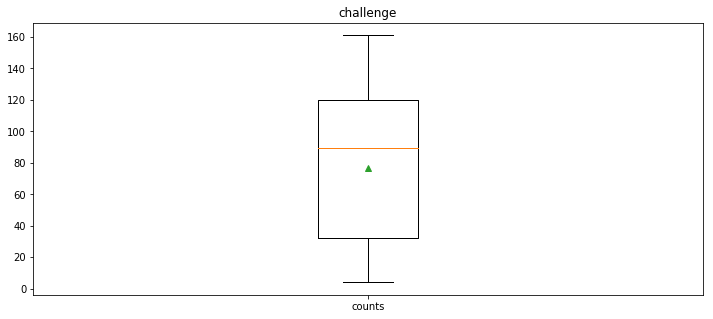

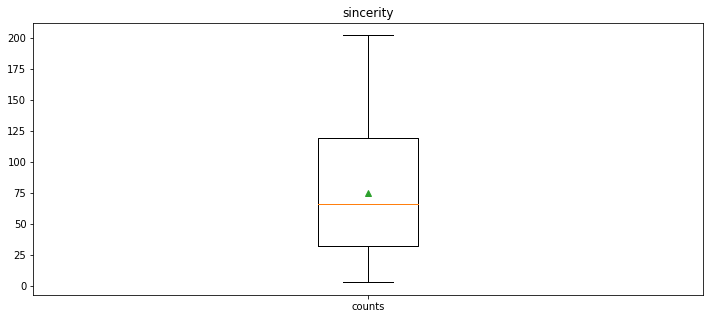

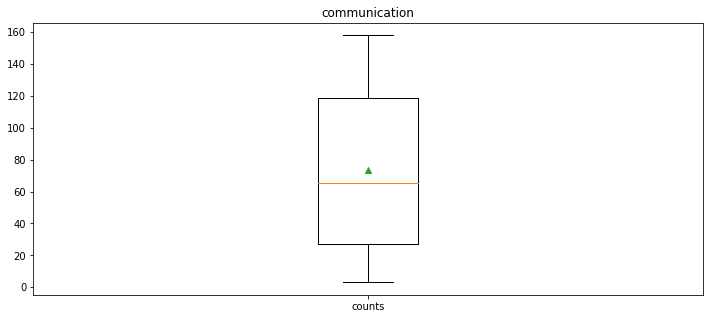

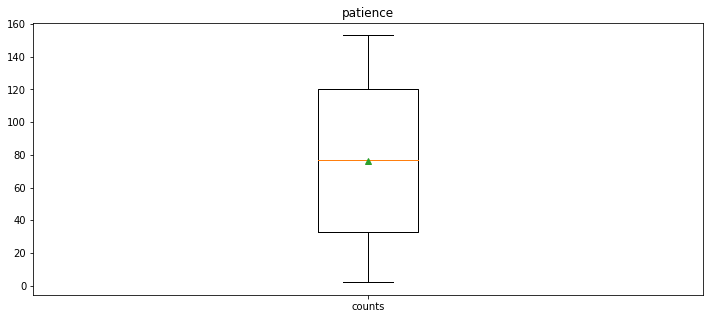

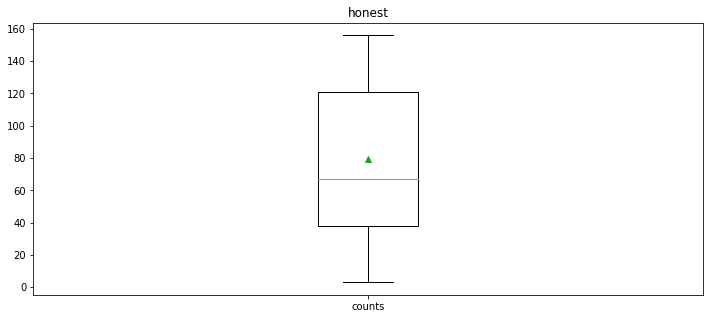

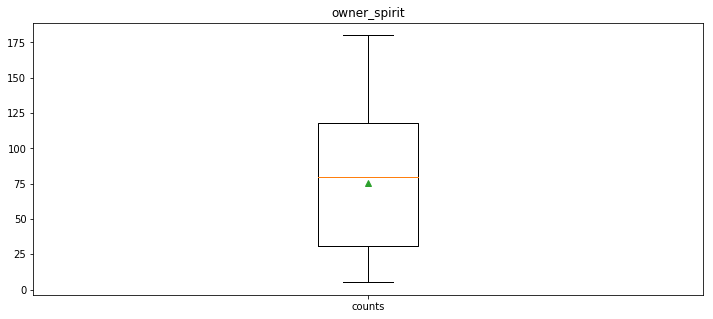

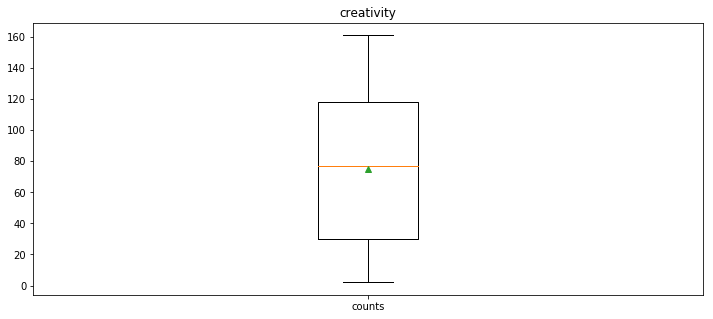

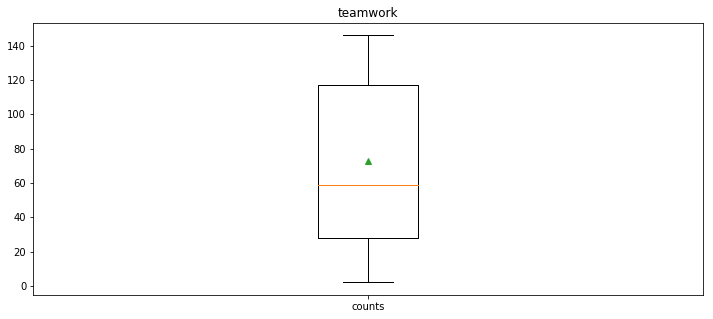

In [45]:
for i in range(0,10):
    train_length = ability_list[i]['sentence'].astype(str).apply(len)
    plt.figure(figsize=(12,5))
    plt.boxplot(train_length, labels=["counts"],showmeans=True)
    plt.title(ability_name_list[i])

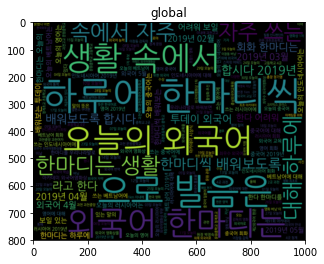

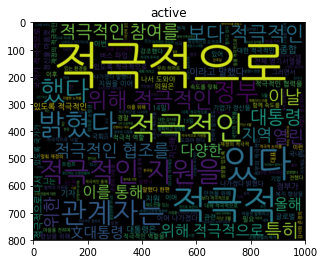

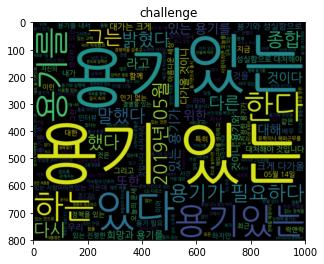

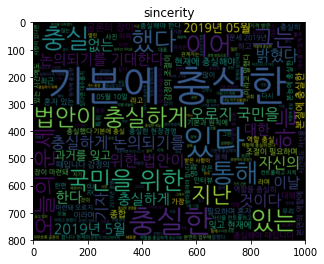

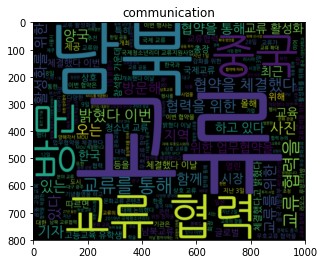

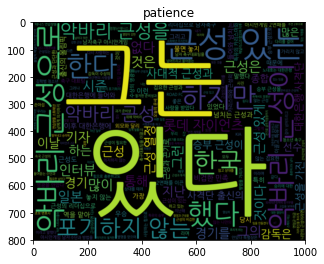

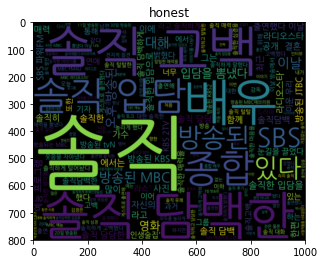

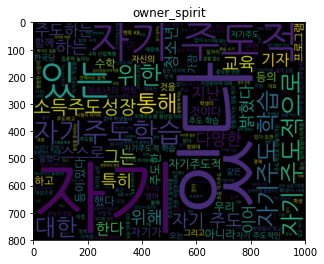

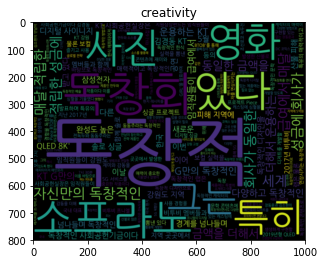

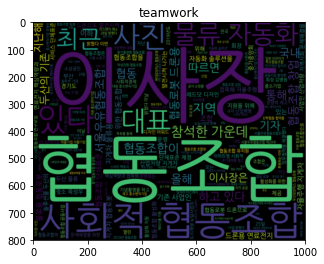

In [59]:
print("[많이 사용된 단어]")
from wordcloud import WordCloud


for i in range(0,10):
    train_sentence = [sentence for sentence in ability_list[i]['sentence'] if type(sentence) is str]
    wordcloud = WordCloud(font_path = 'NanumGothic.otf',width=1000,height=800).generate(''.join(train_sentence))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(ability_name_list[i])
    plt.show()
    wordcloud.to_file(ability_name_list[i]+'.png') #이미지로 저장 